In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:

tf.__version__

'2.13.0'

In [5]:
!pwd

/Users/isaachurwitz/mlc/2023/homework-8


In [6]:
!ls data

test  train


In [7]:
#@ INITIALIZING PATH TO DATASET:
train_dir = './data/train'
test_dir = './data/test'

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

In [8]:
#@ INITIALIZING MODEL CREATION:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-11-20 05:53:45.973826: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-20 05:53:45.973916: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-20 05:53:45.973937: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-20 05:53:45.974508: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-20 05:53:45.974573: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# model.compile(optimizer=keras.optimizers.legacy.SGD(learning_rate=0.002, momentum=0.8),
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

model.compile(loss='binary_crossentropy',\
             optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

answer: binary crossentropy

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that. 

* 1 
* 65
* 896
* 11214912

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
______________

answer: 896

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [13]:
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 918 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
#@ TRAINING THE MODEL:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10


2023-11-20 05:55:08.618541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


183/184 [============================>.] - ETA: 0s - loss: 0.6890 - acc: 0.5513

2023-11-20 05:55:16.294476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


184/184 [==============================] - 9s 45ms/step - loss: 0.6887 - acc: 0.5518 - val_loss: 0.6567 - val_acc: 0.6024
Epoch 2/10
184/184 [==============================] - 8s 44ms/step - loss: 0.6536 - acc: 0.6054 - val_loss: 0.6157 - val_acc: 0.6906
Epoch 3/10
184/184 [==============================] - 8s 42ms/step - loss: 0.6116 - acc: 0.6620 - val_loss: 0.5738 - val_acc: 0.7004
Epoch 4/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5627 - acc: 0.7150 - val_loss: 0.5466 - val_acc: 0.7309
Epoch 5/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5261 - acc: 0.7446 - val_loss: 0.5473 - val_acc: 0.7222
Epoch 6/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5138 - acc: 0.7599 - val_loss: 0.5831 - val_acc: 0.6874
Epoch 7/10
184/184 [==============================] - 8s 42ms/step - loss: 0.5006 - acc: 0.7696 - val_loss: 0.6511 - val_acc: 0.6786
Epoch 8/10
184/184 [==============================] - 8s 43ms/step - loss: 0.485

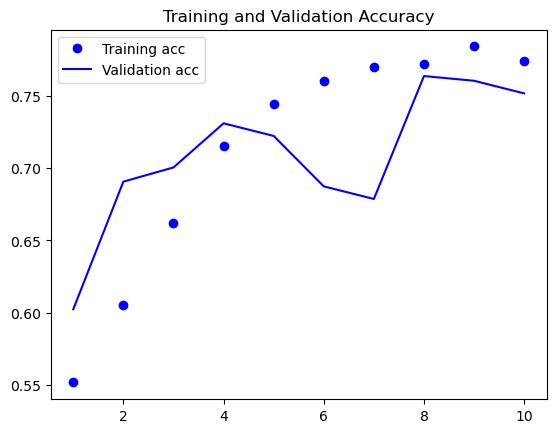

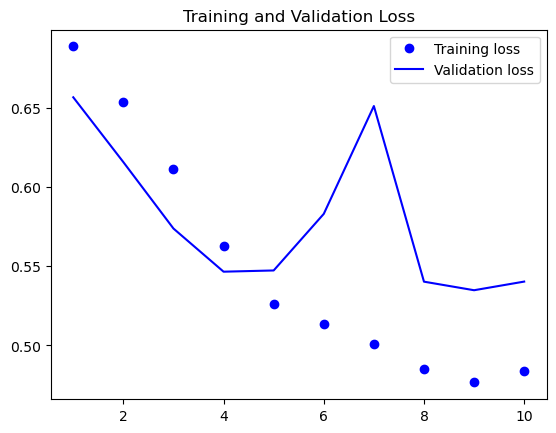

In [16]:
#@ PLOTTING LOSS AND ACCURACY:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [17]:
#@ MEDIAN OF ACCURACY:
acc_median = np.median(acc)
acc_median

0.75224369764328

closest answer: 0.80

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

In [18]:
loss_std = np.std(loss)
loss_std

0.0722984472719513

closest answer: 0.061

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108

In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
184/184 [==============================] - 11s 62ms/step - loss: 0.6123 - acc: 0.6954 - val_loss: 0.7229 - val_acc: 0.6590
Epoch 2/10
184/184 [==============================] - 11s 61ms/step - loss: 0.6218 - acc: 0.6970 - val_loss: 0.7657 - val_acc: 0.5991
Epoch 3/10
184/184 [==============================] - 11s 60ms/step - loss: 0.7215 - acc: 0.6834 - val_loss: 1.0058 - val_acc: 0.5610
Epoch 4/10
184/184 [==============================] - 11s 60ms/step - loss: 0.8099 - acc: 0.6731 - val_loss: 0.7025 - val_acc: 0.6688
Epoch 5/10
184/184 [==============================] - 11s 60ms/step - loss: 0.9436 - acc: 0.6562 - val_loss: 2.0283 - val_acc: 0.5218
Epoch 6/10
184/184 [==============================] - 11s 59ms/step - loss: 1.4987 - acc: 0.6285 - val_loss: 0.6301 - val_acc: 0.7102
Epoch 7/10
184/184 [==============================] - 11s 60ms/step - loss: 1.6889 - acc: 0.6309 - val_loss: 2.5345 - val_acc: 0.5196
Epoch 8/10
184/184 [==============================] - 11s 59ms

In [23]:
mean_test_loss = np.mean((history.history['val_loss']))
mean_test_loss

1.40485919713974

closest answer:  0.78

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98

In [25]:
mean_acc_last_5_epochs = np.mean(history.history['val_acc'][5:])
mean_acc_last_5_epochs

0.6376906394958496

closest answer: 0.58

In [26]:
!mv gitignore.txt .gitignore

In [27]:
!pwd

/Users/isaachurwitz/mlc/2023/homework-8


In [28]:
!ls

Untitled.ipynb   data             data.zip         homework-8.ipynb
